## 1. Постановка задачи

В реальной жизни для изучения свойств целевого пласта на месторождении бурятся скважины, после чего в них опускаются специальные устройства - **каротажные зонды** - измерительные устройства, используемые при геофизических исследованиях в скважине, содержащие приёмники (естественного gamma-излучения, например).  С их помощью проводится запись различных геофизических полей (например, *радиоактивность* или *плотность*), создаваемых горными породами. Подобные исследования называются **геофизическими исследования скважин** - *ГИС*. 

На основе полученных данных специалисты петрофизики проводят интерпретацию и сообщают информацию о том, на какой *глубине* находится **пласт-коллектор** (пласты, содержащие углеводороды), который может накапливать и отдавать флюиды. Типичный пример различных каротажных кривых и их совместной интерпретации представлен на рисунке ниже:

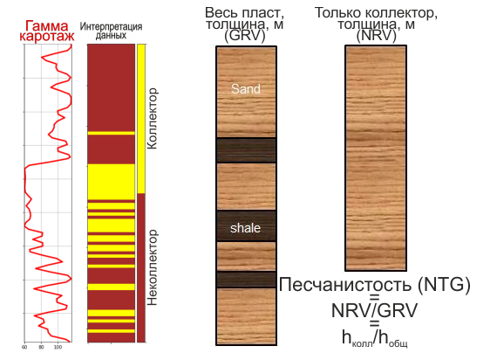

На основе полученной интерпретации можно посчитать такое свойство как **песчанистость** в *зоне бурения скважины*.

**Песчанистость** — это отношение *толщин пластов-коллекторов* к общей толщине *геологического образования*. Данная характеристика позволяет геологам делать предположения об экономической эффективности работы с этим месторождением.

К сожалению, бурение скважин является очень дорогостоящей операцией, поэтому мы используем различные алгоритмы картопостроения с целью прогноза свойств в межскважинном пространстве. В качестве данных в представленной задаче используется информация из синтетической модели месторождения, которая была построена на основе геологического обнажения `Шестаково, Кемеровская область`. По его описанию были определены различные геологические параметры (размеры и геометрия тел, их связанность и значение песчанистости), которые в дальнейшем использовались при построении 3D модели. Подобный подход позволил достаточно точно отобразить реальную геологию (которая обычно не доступна для визуального анализа) и использовать полученный результат в качестве полигона для опробования и оценки различных подходов.

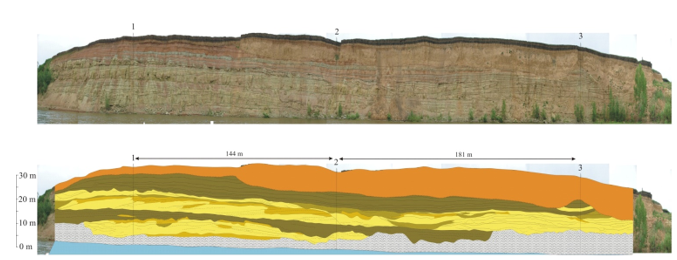

В предоставленном наборе данных имеется информация о `10%` *скважинных данных* (в реальной жизни их может быть менее `1%` от площади месторождения!), используя которые, Вам предлагается построить алгоритм, который бы **предсказывал значения песчанистости** в точках с отсутствующими значениями.


## 2. Data

## 2.1 Train Data

**Вход**: тренировочный датасет (`Training wells.csv`) с заполненными значениями песчанистости.

## 2.2. Test Data

Тестовый датасет (`Empty part.csv`) с пропущенными значениями песчанистости, для которого вы должны предсказать эти значения. [Ссылка](https://disk.yandex.ru/d/M6J9r7yvR8m3GQ?w=1).

## 2.3. Submission

**Выход**: файл с предсказанием песчанитости для тестового файла. 

В выходном файле:

- последовательность строк сохранить
- само предсказание песчанистости добавить четвёртым столбцом в датасет с заголовком столбца `NTG`, как это сделано в тренировочном датасете. 

Получившийся файл загрузить в систему.

## 2.4. Критерии оценивания

В качестве метрики оценивания используется метрика `RMSE`, участники ранжируются относительно значения этой метрики (от меньшего к большему).

За каждую отправку вы не будете видеть балл во избежание подгона под ответ, но будете видеть статус отправки (если всё хорошо - `ОК`, если проблемы с файлом - `WA`). Затем по итогу всех отправок будет засчитана *лучшая попытка*.

In [1]:
import numpy as np
def root_mean_squared_error(y, a):
    return np.sqrt(np.mean((y - a) ** 2))

## 2.5 Правила игры

В этой задаче вам необходимо загрузить свой `Jupyter Notebook` (или скрипт с решением на том языке программирования, на котором вы разрабатывали решение) со всеми способами решения задачи, которые вы испробовали. 

Строгих правил оформления скрипта нет, главное, чтобы в скрипте было показано:

- как вы обрабатывали датасет
- как обучали и тестировали модели. 

Сам скрипт загружается один раз и автоматически никак не проверяется. Скрипт будет использован в финале для вашей защиты решений.

*Максимальный размер загружаемого файла* - `300 MB`.

В каждом своём скрипте решения сохраняйте время и номер отправки (это вы делаете на своей стороне), чтобы потом сопоставить с полученными баллами за каждую отправку на этапе апелляции. 

*Итоговый скрипт, который вы отправляете в этой задаче*, сохраните до финала.

## 3. Data Explore

In [106]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
train_data = pd.read_csv('data/Training_wells.csv')
test_data = pd.read_csv('data/Empty_part.csv')

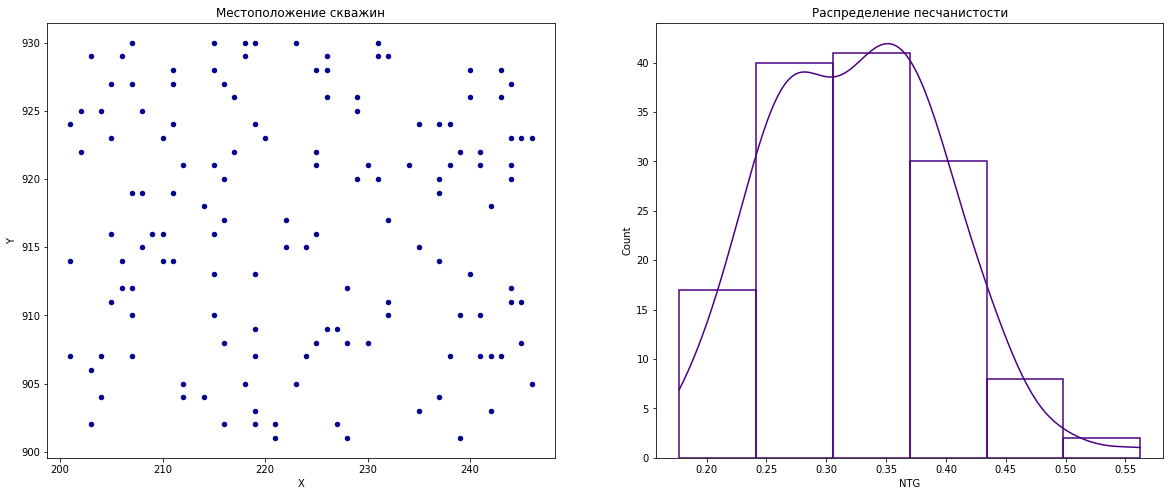

In [149]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
train_data.plot(kind='scatter', 
                 x='X', 
                 y='Y', 
                 color='darkblue', ax=ax1)
ax1.set_title('Местоположение скважин')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
sns.histplot(data=train_data['NTG'], ax=ax2, bins=int(np.log2(n)) + 1, color='indigo', fill=False, kde=True)
ax2.set_title('Распределение песчанистости')
plt.show()

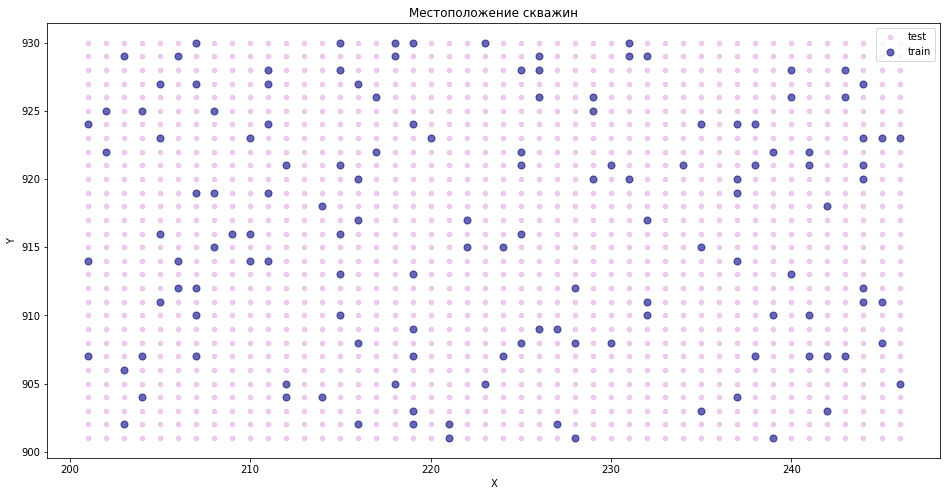

In [150]:
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))
test_data.plot(kind='scatter', 
                 x='X', 
                 y='Y', 
                 color='plum', ax=ax1, label='test', alpha=0.5)
train_data.plot(kind='scatter', 
                 x='X', 
                 y='Y', 
                 color='navy', ax=ax1, s=50, marker='o', label='train', alpha=0.6)
ax1.set_title('Местоположение скважин')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()
plt.show()

In [433]:
X = np.arange(201, 247, 1)
Y = np.arange(901, 931, 1)
mapX = dict(zip(X, range(0, X.shape[0])))
mapY = dict(zip(Y, range(0, Y.shape[0])))
train_data['X1'] = train_data['X'].map(mapX)
train_data['Y1'] = train_data['Y'].map(mapY)
test_data['X1'] = test_data['X'].map(mapX)
test_data['Y1'] = test_data['Y'].map(mapY)

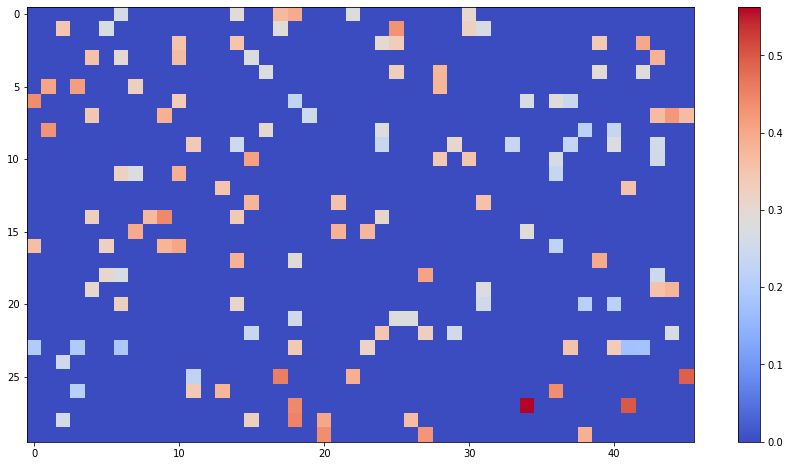

In [434]:
m = np.zeros((Y.shape[0], X.shape[0]))
m.shape
for i, j, v in zip(train_data['X1'], train_data['Y1'], train_data['NTG']):
    m[j, i] = v
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
im = ax.imshow(np.flip(m, axis=0), cmap='coolwarm')
fig.colorbar(im)
ax.set_aspect(1)
plt.show()

In [447]:
x1, x2 = m.shape
x1, x2

(30, 46)

In [772]:
m1 = m.copy()

previous_result = m1[m1!=0].shape[0]
value = 0.3
while m1[m1!=0].shape[0] != 46*30:
    #print(m1[m1!=0].shape[0])
    for i in range(x1):
        for j in range(x2):
            count = 0
            if m1[i, j] == 0:
                d = {'top_left': (i-1, j-1), 
                     'top': (i-1, j), 
                     'top_right': (i-1, j+1),
                     'left': (i, j-1), 
                     'right': (i, (j + 1)), 
                     'bottom_left': (i + 1, j - 1), 
                     'bottom': (i+1, j), 
                     'bottom_right': (i+1, j+1)}
                dummy = []
                for k, (v1, v2) in d.items():
                    if v1 >=0 and v2>=0 and v1 < x1 and v2 < x2:
                        dummy.append(m1[v1, v2])
                        count +=1
                if dummy.count(0) / len(dummy) < value:
                    if value >= 0.75:
                         m1[i, j] = np.mean(dummy)
                    # print(f'{i}, {j}: {fish}, {m[i, j]}, {dummy}')
                    else:
                        m1[i, j] = np.median(dummy)
    current_result = m1[m1!=0].shape[0]
    if current_result == previous_result:
        #print('change')
        value += 0.01
        #print(f'value{value}')
    previous_result = current_result

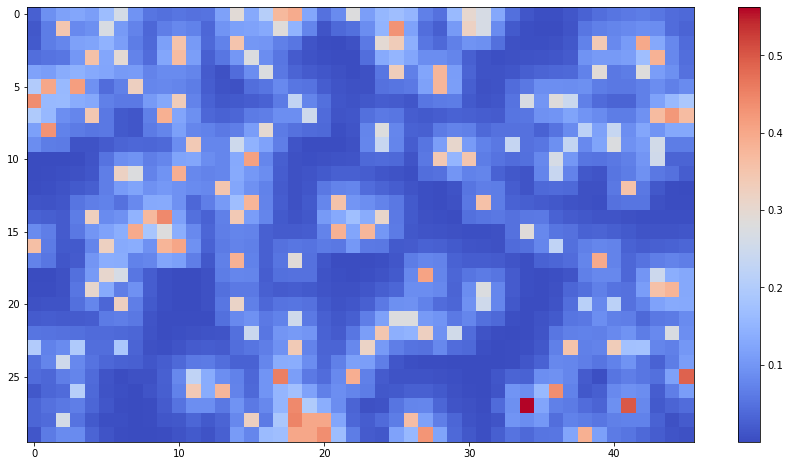

In [773]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
im = ax.imshow(np.flip(m1, axis=0), cmap='coolwarm')
fig.colorbar(im)
ax.set_aspect(1)
plt.show()

In [239]:
import numpy as np


def euclidean_distance(x, y):
    '''

    Parameters
    ----------
    x : np.ndarray размера N x D
        обучающая выборка.
    y : np.ndarray размера M x D
        тестовая выборка.

    Raises
    ------
    NotImplementedError
        DESCRIPTION.

    Returns
    -------
    Функция возвращает np.ndarray размера N x M,
    каждый элемент которого - евклидово расстояния между
    соответствующей парой векторов из массивов x и y.
    Уменьшим число операций с помощью трюка, раскрывая скобки.
    '''
    x2 = np.sum(x**2, axis=1).reshape(-1, 1)
    y2 = np.sum(y**2, axis=1)
    result = np.sqrt(x2 + y2 - 2 * x @ y.T)
    return result

In [306]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [340]:
X = train_data[['X', 'Y']].values
y = train_data['NTG'].values

In [343]:
cv = KFold(n_splits=3, shuffle=True)
model = KNeighborsRegressor()
parameters = {'n_neighbors': np.arange(2, 50),
              'weights': ['distance', 'uniform'],
              'p': [1, 2, 3]}
clf = GridSearchCV(model, 
                   parameters, 
                   cv=cv, 
                   scoring='neg_root_mean_squared_error')
clf.fit(X, y)
clf.best_estimator_

KNeighborsRegressor(n_neighbors=4, p=1, weights='distance')

In [344]:
clf.best_score_

-0.05735400089110868

In [305]:
X = train_data[['X', 'Y']].values
y = train_data['NTG'].values

In [328]:
tr = euclidean_distance(train_data[['X', 'Y']].values, test_data[['X', 'Y']].values)

In [330]:
cv = KFold(n_splits=5, shuffle=True)
regressors = []
for i in range(10):
    rmse = []
#     xgbs = xgb.XGBRegressor(max_depth=400, 
#                            learning_rate=0.1, 
#                            n_estimators=400, 
#                            silent=True, 
#                            booster='gbtree',
#                            random_state=42)
    GBC =  GradientBoostingRegressor(n_estimators=100, 
                                     subsample=0.5,
                                     random_state=42)
    knn5 = KNeighborsRegressor(n_neighbors=5, p=1, weights='distance')
    knn4 = KNeighborsRegressor(n_neighbors=4, p=1, weights='distance')
    knn3 = KNeighborsRegressor(n_neighbors=3, p=1, weights='distance')
    knn8 = KNeighborsRegressor(n_neighbors=8, p=1, weights='distance')
    knn9 = KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')
    knn10 = KNeighborsRegressor(n_neighbors=10, p=1, weights='distance')
    knn25 = KNeighborsRegressor(n_neighbors=25, p=1, weights='distance')
    knn6 = KNeighborsRegressor(n_neighbors=6, p=1, weights='distance')
    knn7 = KNeighborsRegressor(n_neighbors=7, p=1,weights='distance')
    knn15 = KNeighborsRegressor(n_neighbors=15, p=1,weights='distance')
    rf = RandomForestRegressor(n_estimators=1000, random_state=42, max_depth=10)
    et = ExtraTreesRegressor(n_estimators=1000)
    vr = VotingRegressor([('knn6', knn6), 
                          ('knn7', knn7), 
                          ('RF', rf), 
                          ('knn', knn15), 
                          #('xgb', xgbs), 
                          ('GBC', GBC), 
                          ('et', et), 
                          ('knn5', knn5), 
                          ('knn4', knn4), 
                          ('knn3', knn3), 
                          ('knn8', knn8), 
                          ('knn9', knn9), 
                          ('knn10', knn10), 
                          ('knn25', knn25)])
    for train_index, test_index in cv.split(tr):
        X_train, X_test = tr[train_index], tr[test_index]
        y_train, y_test = y[train_index], y[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                           a=vr.predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

KeyboardInterrupt: 

In [457]:
X = train_data[['X1', 'Y1']].values
y = train_data['NTG'].values

In [487]:
from sklearn.preprocessing import StandardScaler

In [652]:
X = train_data[['X1', 'Y1']].values
y = train_data['NTG'].values
regressors = []
cv = KFold(n_splits=10, shuffle=True)
for i in range(10):
    rmse = []
    knn6 = KNeighborsRegressor(n_neighbors=6, p=1, weights='distance')
    knn7 = KNeighborsRegressor(n_neighbors=7, p=1,weights='distance')
    
    knn25 = KNeighborsRegressor(n_neighbors=25, p=1,weights='distance')
    rf = RandomForestRegressor(random_state=42, max_depth=14)
    vr = VotingRegressor([('knn6', knn6), ('knn7', knn7), ('RF', rf), ('knn', knn25)])
    for train_index, test_index in cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                           a=vr .predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.056502541753054324
iteration 1, RMSE: 0.0561983254024321
iteration 2, RMSE: 0.05620935729251143
iteration 3, RMSE: 0.054755214946339004
iteration 4, RMSE: 0.056660244829665626
iteration 5, RMSE: 0.05470304469893419
iteration 6, RMSE: 0.05529967584805758
iteration 7, RMSE: 0.05616347855040536
iteration 8, RMSE: 0.0552793156062273
iteration 9, RMSE: 0.05580973203068566


In [653]:
X_tst = test_data[['X1', 'Y1']]
res = []
for c in regressors:
    res.append(c.predict(X_tst))
dat = pd.DataFrame(np.array(res).T)

In [654]:
submission = dat.mean(axis=1)

In [655]:
test_data['pred_NTG'] = submission

In [658]:
X = train_data[['X1', 'Y1']].values
y = train_data['NTG'].values

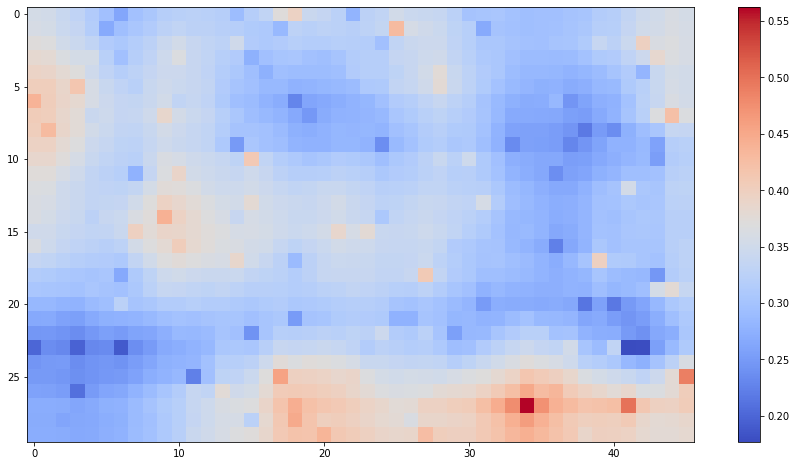

In [656]:
X = np.arange(201, 247, 1)
Y = np.arange(901, 931, 1)
mapX = dict(zip(X, range(0, X.shape[0])))
mapY = dict(zip(Y, range(0, Y.shape[0])))
train_data['X1'] = train_data['X'].map(mapX)
train_data['Y1'] = train_data['Y'].map(mapY)
test_data['X1'] = test_data['X'].map(mapX)
test_data['Y1'] = test_data['Y'].map(mapY)
m3 = np.zeros((Y.shape[0], X.shape[0]))
m3.shape
for i, j, v in zip(train_data['X1'], train_data['Y1'], train_data['NTG']):
    m3[j, i] = v
for i, j, v in zip(test_data['X1'], test_data['Y1'], test_data['pred_NTG']):
    m3[j, i] = v
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
im = ax.imshow(np.flip(m3, axis=0), cmap='coolwarm')
fig.colorbar(im)
ax.set_aspect(1)
plt.show()

In [503]:
X = train_data[['X1', 'Y1']].values
y = train_data['NTG'].values
regressors = []
cv = KFold(n_splits=10, shuffle=True)
for i in range(10):
    rmse = []
    #knn6 = KNeighborsRegressor(n_neighbors=6, p=1, weights='distance')
    #knn7 = KNeighborsRegressor(n_neighbors=7, p=1,weights='distance')
    
    #knn25 = KNeighborsRegressor(n_neighbors=25, p=1,weights='distance')
    rf = RandomForestRegressor(random_state=42, max_depth=14)
    vr = VotingRegressor([('RF', rf)])
    for train_index, test_index in cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                           a=vr.predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.05426651295818472
iteration 1, RMSE: 0.05604256107063131
iteration 2, RMSE: 0.05719769335706
iteration 3, RMSE: 0.0572233858452227
iteration 4, RMSE: 0.05626033880099422
iteration 5, RMSE: 0.05489777793308798
iteration 6, RMSE: 0.057391281610977285
iteration 7, RMSE: 0.05620725453628852
iteration 8, RMSE: 0.0567772138330521
iteration 9, RMSE: 0.05654878046121603


In [504]:
X_tst = test_data[['X1', 'Y1']]
res = []
for c in regressors:
    res.append(c.predict(X_tst))
dat = pd.DataFrame(np.array(res).T)

In [505]:
submission = dat.mean(axis=1)

In [506]:
test_data['pred_NTG'] = submission

In [507]:
X = train_data[['X1', 'Y1']].values
y = train_data['NTG'].values

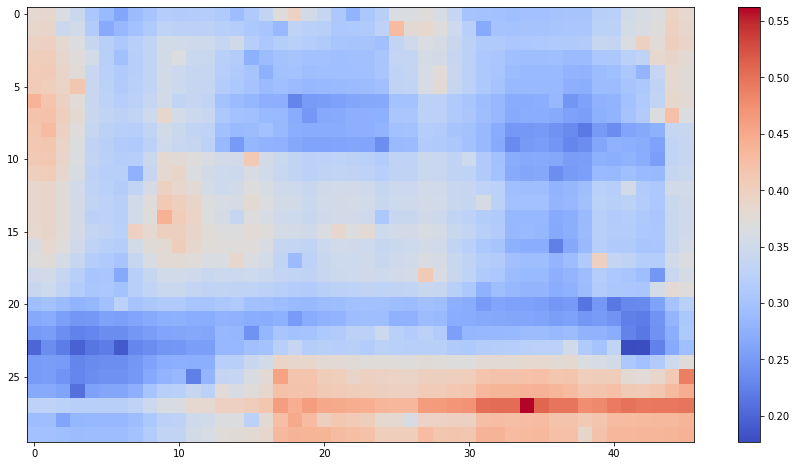

In [508]:
X = np.arange(201, 247, 1)
Y = np.arange(901, 931, 1)
mapX = dict(zip(X, range(0, X.shape[0])))
mapY = dict(zip(Y, range(0, Y.shape[0])))
train_data['X1'] = train_data['X'].map(mapX)
train_data['Y1'] = train_data['Y'].map(mapY)
test_data['X1'] = test_data['X'].map(mapX)
test_data['Y1'] = test_data['Y'].map(mapY)
m2 = np.zeros((Y.shape[0], X.shape[0]))
m2.shape
for i, j, v in zip(train_data['X1'], train_data['Y1'], train_data['NTG']):
    m2[j, i] = v
for i, j, v in zip(test_data['X1'], test_data['Y1'], test_data['pred_NTG']):
    m2[j, i] = v
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
im = ax.imshow(np.flip(m2, axis=0), cmap='coolwarm')
fig.colorbar(im)
ax.set_aspect(1)
plt.show()

In [ ]:
def manhattan_distance(x, y, W=False):
    '''

    Parameters
    ----------
    x : np.ndarray размера N x D
        обучающая выборка.
    y : np.ndarray размера M x D
        тестовая выборка.

    Raises
    ------
    NotImplementedError
        DESCRIPTION.

    Returns
    -------
    Функция возвращает np.ndarray размера N x M,
    каждый элемент которого - расстояние манхэтэна между
    соответствующей парой векторов из массивов x и y.

    '''
    if type(W) == np.ndarray:
        result = np.sum(np.abs(x[:, None] - y) * W, axis=2)
    elif W == False:
        result = np.sum(np.abs(x[:, None] - y), axis=2) 
    return result

In [551]:
KNeighborsRegressor?

In [ ]:
X = train_data[['X1', 'Y1']].values
y = train_data['NTG'].values

In [575]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances

In [788]:
distanse = pd.DataFrame(euclidean_distances(train_data[['X', 'Y']]))

In [579]:
pd.unique(train_data['X'])

array([201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 214,
       215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,
       228, 229, 230, 231, 232, 234, 235, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246], dtype=int64)

In [580]:
pd.unique(test_data['X'])

array([201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 242, 243, 244, 245, 246], dtype=int64)

In [586]:
np.sort(pd.unique(train_data['Y']))

array([901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913,
       914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926,
       927, 928, 929, 930], dtype=int64)

In [587]:
np.sort(pd.unique(test_data['Y']))

array([901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913,
       914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926,
       927, 928, 929, 930], dtype=int64)

In [ ]:
['' for x in np.arange(901, )]

In [588]:
train_data

,Well,X,Y,NTG,X1,Y1
0,201-907,201,907,0.2006,0,6
1,201-914,201,914,0.3624,0,13
2,201-924,201,924,0.4381,0,23
3,202-922,202,922,0.4289,1,21
4,202-925,202,925,0.4021,1,24
...,...,...,...,...,...,...
133,245-908,245,908,0.2719,44,7
134,245-911,245,911,0.3780,44,10
135,245-923,245,923,0.4239,44,22
136,246-905,246,905,0.4900,45,4


In [590]:
train_data = pd.read_csv('data/Training_wells.csv')
test_data = pd.read_csv('data/Empty_part.csv')

In [591]:
train_data

,Well,X,Y,NTG
0,201-907,201,907,0.2006
1,201-914,201,914,0.3624
2,201-924,201,924,0.4381
3,202-922,202,922,0.4289
4,202-925,202,925,0.4021
...,...,...,...,...
133,245-908,245,908,0.2719
134,245-911,245,911,0.3780
135,245-923,245,923,0.4239
136,246-905,246,905,0.4900


In [592]:
test_data

,Well,X,Y
0,201-901,201,901
1,201-902,201,902
2,201-903,201,903
3,201-904,201,904
4,201-905,201,905
...,...,...,...
1237,246-926,246,926
1238,246-927,246,927
1239,246-928,246,928
1240,246-929,246,929


In [789]:
concat = pd.concat((train_data.iloc[:, :-1], test_data))

In [790]:
sort_concat = concat.sort_values(by=['X', 'Y']).reset_index()

In [791]:
sort_concat.set_index('Well', inplace=True)

In [792]:
sort_concat

,index,X,Y,NTG,X1,Y1,pred_NTG2,pred_NTG,pred_NTG3,pred_NTG45
Well,,,,,,,,,,
201-901,0,201,901,NaN,0,0,0.258173,0.271207,0.266044,0.262260
201-902,1,201,902,NaN,0,1,0.256341,0.269867,0.262107,0.258364
201-903,2,201,903,NaN,0,2,0.256406,0.271720,0.259360,0.260348
201-904,3,201,904,NaN,0,3,0.254684,0.258734,0.252174,0.239509
201-905,4,201,905,NaN,0,4,0.244227,0.250660,0.247337,0.245862
...,...,...,...,...,...,...,...,...,...,...
246-926,1237,246,926,NaN,45,25,0.333069,0.353230,0.323521,0.335607
246-927,1238,246,927,NaN,45,26,0.329278,0.359605,0.321538,0.364145
246-928,1239,246,928,NaN,45,27,0.329298,0.360648,0.321349,0.364289


In [793]:
distanse = pd.DataFrame(manhattan_distances(sort_concat[['X', 'Y']]))
distanse

,0,1,2,3,4,5,6,7,8,9,...,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0
1,1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0
2,2.0,1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
3,3.0,2.0,1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,...,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0
4,4.0,3.0,2.0,1.0,0.0,1.0,2.0,3.0,4.0,5.0,...,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,70.0,69.0,68.0,67.0,66.0,65.0,64.0,63.0,62.0,61.0,...,5.0,4.0,3.0,2.0,1.0,0.0,1.0,2.0,3.0,4.0
1376,71.0,70.0,69.0,68.0,67.0,66.0,65.0,64.0,63.0,62.0,...,6.0,5.0,4.0,3.0,2.0,1.0,0.0,1.0,2.0,3.0
1377,72.0,71.0,70.0,69.0,68.0,67.0,66.0,65.0,64.0,63.0,...,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,1.0,2.0
1378,73.0,72.0,71.0,70.0,69.0,68.0,67.0,66.0,65.0,64.0,...,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,1.0


In [794]:
sortt = pd.concat((sort_concat, distanse), axis=1)
sortt

,index,X,Y,NTG,X1,Y1,pred_NTG2,pred_NTG,pred_NTG3,pred_NTG45,...,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379
201-901,0.0,201.0,901.0,NaN,0.0,0.0,0.258173,0.271207,0.266044,0.262260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201-902,1.0,201.0,902.0,NaN,0.0,1.0,0.256341,0.269867,0.262107,0.258364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201-903,2.0,201.0,903.0,NaN,0.0,2.0,0.256406,0.271720,0.259360,0.260348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201-904,3.0,201.0,904.0,NaN,0.0,3.0,0.254684,0.258734,0.252174,0.239509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201-905,4.0,201.0,905.0,NaN,0.0,4.0,0.244227,0.250660,0.247337,0.245862,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,2.0,1.0,0.0,1.0,2.0,3.0,4.0
1376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,5.0,4.0,3.0,2.0,1.0,0.0,1.0,2.0,3.0
1377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,1.0,2.0
1378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0,1.0


In [632]:
train = train_data.merge(sortt, on=['Well', 'X', 'Y'])

In [639]:
X_1 = train.drop(labels=['Well', 'X', 'Y', 'index', 'NTG'], axis=1).values
y_1 = train['NTG'].values

In [796]:
y_1

array([0.2006, 0.3624, 0.4381, 0.4289, 0.4021, 0.2628, 0.2517, 0.3452,
       0.2092, 0.1974, 0.4136, 0.3061, 0.3268, 0.3431, 0.3568, 0.3054,
       0.3228, 0.2682, 0.1897, 0.3249, 0.2659, 0.3205, 0.2963, 0.2637,
       0.3971, 0.2775, 0.3244, 0.3729, 0.3801, 0.4419, 0.3869, 0.4042,
       0.3901, 0.3333, 0.3661, 0.3533, 0.3394, 0.2251, 0.3388, 0.3769,
       0.3484, 0.3125, 0.3867, 0.3402, 0.25  , 0.3512, 0.2918, 0.3248,
       0.2419, 0.3791, 0.4099, 0.2759, 0.2979, 0.2762, 0.4562, 0.2865,
       0.3721, 0.4488, 0.4436, 0.3375, 0.2514, 0.2895, 0.2287, 0.3941,
       0.2484, 0.4369, 0.4   , 0.3857, 0.3557, 0.3894, 0.2795, 0.3162,
       0.3775, 0.3471, 0.3081, 0.2386, 0.2794, 0.2961, 0.2778, 0.3299,
       0.3322, 0.429 , 0.3636, 0.2778, 0.4268, 0.325 , 0.4079, 0.3421,
       0.3774, 0.3764, 0.2562, 0.3074, 0.3486, 0.3201, 0.3018, 0.2519,
       0.2766, 0.3579, 0.2674, 0.2347, 0.5625, 0.2874, 0.2696, 0.4356,
       0.2244, 0.2381, 0.2653, 0.2851, 0.3534, 0.2312, 0.2454, 0.3882,
      

In [640]:
X_1

array([[ 6.,  5.,  4., ..., 66., 67., 68.],
       [13., 12., 11., ..., 59., 60., 61.],
       [23., 22., 21., ..., 49., 50., 51.],
       ...,
       [66., 65., 64., ...,  6.,  7.,  8.],
       [49., 48., 47., ..., 23., 24., 25.],
       [67., 66., 65., ...,  5.,  6.,  7.]])

In [797]:
cv = KFold(n_splits=3, shuffle=True)
model = KNeighborsRegressor()
parameters = {'n_neighbors': np.arange(2, 50),
              'weights': ['distance', 'uniform'],
              'p': [1, 2, 3]}
clf = GridSearchCV(model, 
                   parameters, 
                   cv=cv, 
                   scoring='neg_root_mean_squared_error')
clf.fit(X_1, y_1)
clf.best_estimator_

KNeighborsRegressor(n_neighbors=8, p=3, weights='distance')

In [798]:
clf.best_score_

-0.06278022397340993

In [801]:
regressors = []
cv = KFold(n_splits=10, shuffle=True)
for i in range(10):
    rmse = []
    knn2 = KNeighborsRegressor(n_neighbors=2, p=1, weights='distance')
    knn6 = KNeighborsRegressor(n_neighbors=6, p=1, weights='distance')
    knn7 = KNeighborsRegressor(n_neighbors=7, p=1,weights='distance')
    
    knn25 = KNeighborsRegressor(n_neighbors=25, p=1,weights='distance')
    rf = RandomForestRegressor(random_state=41, max_depth=14)
    vr = VotingRegressor([('knn6', knn6), ('knn7', knn7), ('RF', rf), ('knn', knn25), ('knn2', knn2)])
    for train_index, test_index in cv.split(X_1):
        X_train, X_test = X_1[train_index], X_1[test_index]
        y_train, y_test = y_1[train_index], y_1[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                           a=vr.predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.055921455035927006


KeyboardInterrupt: 

In [645]:
test = test_data.merge(sortt, on=['Well', 'X', 'Y'])

In [646]:
X_t = test.drop(labels=['Well', 'X', 'Y', 'index'], axis=1).values
res = []
for c in regressors:
    res.append(c.predict(X_t))
dat = pd.DataFrame(np.array(res).T)

In [647]:
submission = dat.mean(axis=1)

In [649]:
test_data['pred_NTG2'] = submission

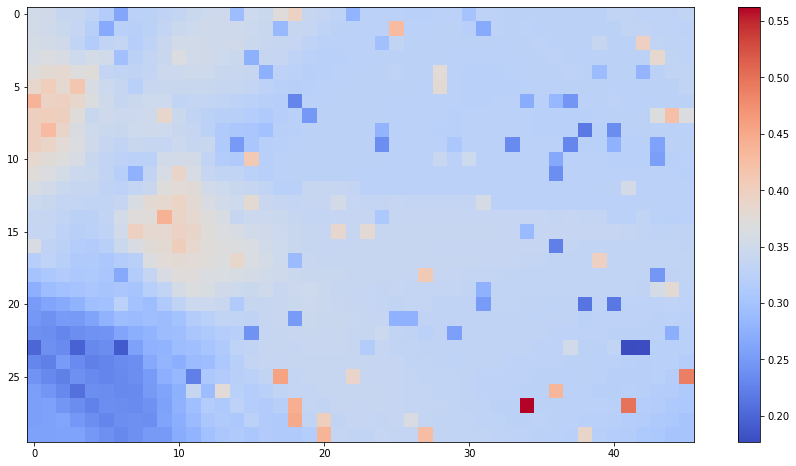

In [651]:
X = np.arange(201, 247, 1)
Y = np.arange(901, 931, 1)
mapX = dict(zip(X, range(0, X.shape[0])))
mapY = dict(zip(Y, range(0, Y.shape[0])))
train_data['X1'] = train_data['X'].map(mapX)
train_data['Y1'] = train_data['Y'].map(mapY)
test_data['X1'] = test_data['X'].map(mapX)
test_data['Y1'] = test_data['Y'].map(mapY)
m2 = np.zeros((Y.shape[0], X.shape[0]))
m2.shape
for i, j, v in zip(train_data['X1'], train_data['Y1'], train_data['NTG']):
    m2[j, i] = v
for i, j, v in zip(test_data['X1'], test_data['Y1'], test_data['pred_NTG2']):
    m2[j, i] = v
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
im = ax.imshow(np.flip(m2, axis=0), cmap='coolwarm')
fig.colorbar(im)
ax.set_aspect(1)
plt.show()

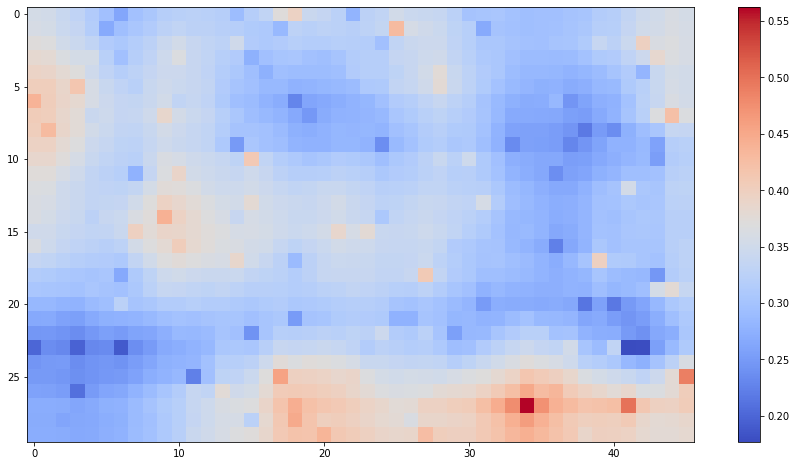

In [660]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
im = ax.imshow(np.flip(m3, axis=0), cmap='coolwarm')
fig.colorbar(im)
ax.set_aspect(1)
plt.show()

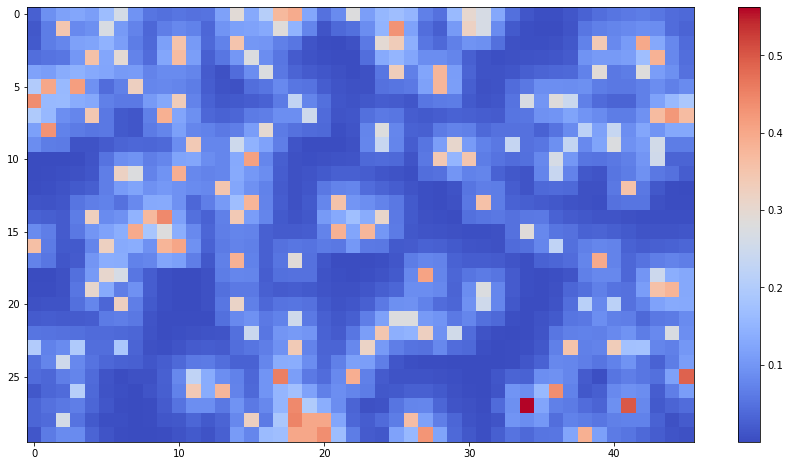

In [661]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
im = ax.imshow(np.flip(m1, axis=0), cmap='coolwarm')
fig.colorbar(im)
ax.set_aspect(1)
plt.show()

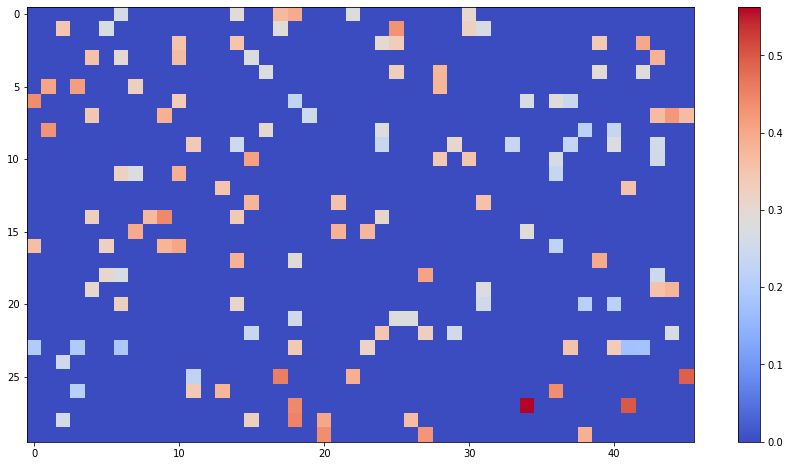

In [662]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
im = ax.imshow(np.flip(m, axis=0), cmap='coolwarm')
fig.colorbar(im)
ax.set_aspect(1)
plt.show()

In [676]:
from sklearn.ensemble import AdaBoostRegressor

In [677]:
AdaBoostRegressor?

iteration 0, RMSE: 0.050722904698145554
iteration 1, RMSE: 0.0483821994979886
iteration 2, RMSE: 0.046058507923292115
iteration 3, RMSE: 0.0473576362464255
iteration 4, RMSE: 0.04833438904287483
iteration 5, RMSE: 0.05343505119213667
iteration 6, RMSE: 0.050656635278801855
iteration 7, RMSE: 0.04761271062933666
iteration 8, RMSE: 0.05031737451395516
iteration 9, RMSE: 0.052102047002250046


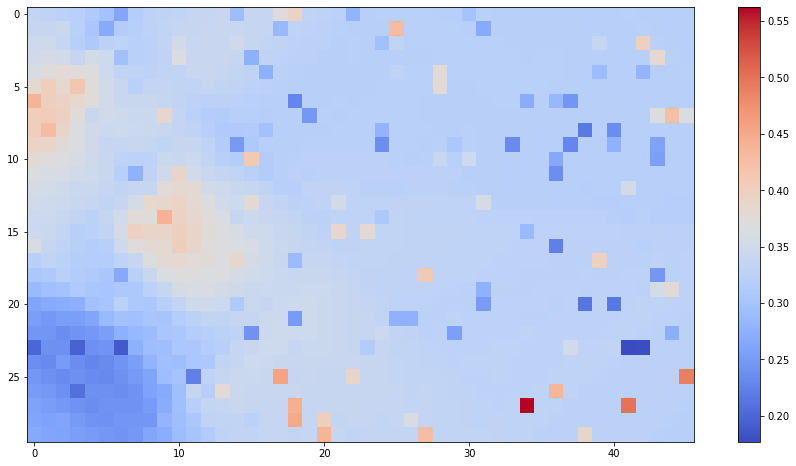

In [678]:
regressors = []
cv = KFold(n_splits=3, shuffle=True)
for i in range(10):
    rmse = []
    knn2 = KNeighborsRegressor(n_neighbors=2, p=1, weights='distance')
    knn6 = KNeighborsRegressor(n_neighbors=6, p=1, weights='distance')
    knn7 = KNeighborsRegressor(n_neighbors=7, p=1,weights='distance')
    
    knn25 = KNeighborsRegressor(n_neighbors=25, p=1,weights='distance')
    rf = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=14)
    rf1 = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=None)
    rf2 = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_leaf=3)
    rf3 = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=10)
    rf4 = ExtraTreesRegressor(n_estimators=500)
    rf5 = AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=2, p=1, weights='distance'))
    vr = VotingRegressor([('RF', rf), ('RF1', rf1),('RF2', rf2) ,('RF3', rf3), ('knn2', knn2), ('knn25', knn25), 
                          ('rf4', rf4), ('rf5', rf5)])
                          # ('knn6', knn6), 
                          #('knn7', knn7), 
                          
                          #('knn', knn25), 
                          #('knn2', knn2)])
    
    for train_index, test_index in cv.split(X):
        X_train, X_test = X_1[train_index], X_1[test_index]
        y_train, y_test = y_1[train_index], y_1[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                           a=vr.predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')
    
X_t = test.drop(labels=['Well', 'X', 'Y', 'index'], axis=1).values
res = []
for c in regressors:
    res.append(c.predict(X_t))
date = pd.DataFrame(np.array(res).T)
submission = date.mean(axis=1)
test_data['pred_NTG3'] = submission
X = np.arange(201, 247, 1)
Y = np.arange(901, 931, 1)
mapX = dict(zip(X, range(0, X.shape[0])))
mapY = dict(zip(Y, range(0, Y.shape[0])))
train_data['X1'] = train_data['X'].map(mapX)
train_data['Y1'] = train_data['Y'].map(mapY)
test_data['X1'] = test_data['X'].map(mapX)
test_data['Y1'] = test_data['Y'].map(mapY)
m4 = np.zeros((Y.shape[0], X.shape[0]))
m4.shape
for i, j, v in zip(train_data['X1'], train_data['Y1'], train_data['NTG']):
    m4[j, i] = v
for i, j, v in zip(test_data['X1'], test_data['Y1'], test_data['pred_NTG3']):
    m4[j, i] = v
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
im = ax.imshow(np.flip(m4, axis=0), cmap='coolwarm')
fig.colorbar(im)
ax.set_aspect(1)
plt.show()

In [673]:
RandomForestRegressor?

<AxesSubplot:xlabel='X', ylabel='Y'>

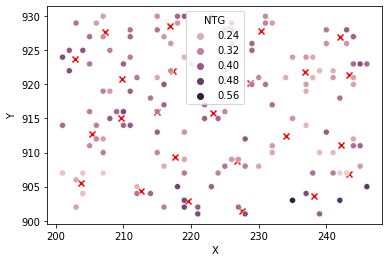

In [680]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=25, random_state=42)
kmeans.fit(train_data[['X', 'Y']])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
sns.scatterplot(data=train_data, x='X', y='Y', hue='NTG')

In [681]:
columns = ['X', 'Y', 'cluster']
agg_types = ['mean', 'median', 'min', 'max']

def generate_grouped_features(train, test):
    '''
        Функция принимает на вход обучающую и тестовую выборки.
        На выходе возврашает датасеты со сгенерированными признаками.
        
        Признаки получены путем группировки столбцов из списка columns,
        и дальнейшей агрегацией столбца NTG (из обучающей выборки) способом
        из agg_types. Таким образом генерируются
        len(columns) * len(agg_types) новых признаков. Далее полученные признаки
        добавляются к обучающему и тестовому датасету.
        
        Признаки именуются как NTG_{группируемый столбец}_{тип агрегации}.        
    '''
    train_copy = train.copy()
    test_copy = test.copy()
    
    for column in columns:
        for agg_type in agg_types:
            group = train_copy.groupby(by=column).agg({'NTG':agg_type})
            group.reset_index(inplace=True)
            group.columns = [column, 'NTG_{}_{}'.format(column, agg_type)]
            
            train_copy = pd.merge(train_copy, group, on=column, how='left')
            test_copy = pd.merge(test_copy, group, on=column, how='left')
            
    return train_copy, test_copy

In [683]:
train_data['cluster'] = kmeans.labels_

test_copy = test_data.copy()
test_copy['cluster'] = kmeans.predict(test_data[['X', 'Y']])

train_gen, test_gen = generate_grouped_features(train_data, test_copy)
assert train_gen.shape[1] == (len(columns) * len(agg_types) + train.shape[1])

AssertionError: 

In [684]:
test_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1241
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Well                1242 non-null   object 
 1   X                   1242 non-null   int64  
 2   Y                   1242 non-null   int64  
 3   pred_NTG2           1242 non-null   float64
 4   X1                  1242 non-null   int64  
 5   Y1                  1242 non-null   int64  
 6   pred_NTG            1242 non-null   float64
 7   pred_NTG3           1242 non-null   float64
 8   cluster             1242 non-null   int32  
 9   NTG_X_mean          1152 non-null   float64
 10  NTG_X_median        1152 non-null   float64
 11  NTG_X_min           1152 non-null   float64
 12  NTG_X_max           1152 non-null   float64
 13  NTG_Y_mean          1242 non-null   float64
 14  NTG_Y_median        1242 non-null   float64
 15  NTG_Y_min           1242 non-null   float64
 16  NTG_Y_

<AxesSubplot:>

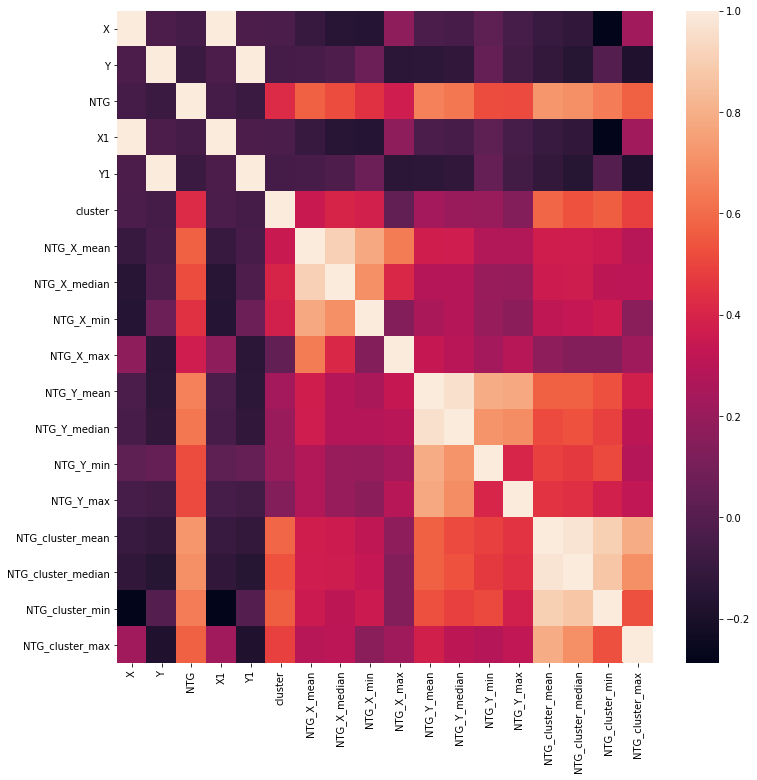

In [685]:
fig, axs = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(train_gen.corr(), ax=axs)

In [728]:
X_2 = pd.concat((train, train_gen.iloc[:, 7:]), axis=1).drop(labels=['Well', 'X', 'Y', 'index', 'NTG'], axis=1)

In [730]:
X_3 = X_2.drop(labels=['NTG_Y_mean', 'NTG_cluster_mean'], axis=1).values

In [702]:
from sklearn.linear_model import LinearRegression

In [726]:
X_train.shape

(138, 124)

In [725]:
y_train.shape

(124,)

In [750]:
features = pd.concat((train_data[['X', 'Y']], train_gen.iloc[:, 7:]), axis=1)

In [753]:
featuresssss = ['X','Y',
            'NTG_Y_mean', 'NTG_Y_median', 'NTG_Y_min', 'NTG_Y_max',
            'NTG_cluster_mean', 'NTG_cluster_median', 'NTG_cluster_min', 'NTG_cluster_max']

In [757]:
f = features[featuresssss].values

In [805]:
featuresssss

,X,Y,NTG_X_mean,NTG_X_median,NTG_X_min,NTG_X_max,NTG_Y_mean,NTG_Y_median,NTG_Y_min,NTG_Y_max,NTG_cluster_mean,NTG_cluster_median,NTG_cluster_min,NTG_cluster_max
0,201,907,0.333700,0.36240,0.2006,0.4381,0.253744,0.20060,0.1770,0.3534,0.218567,0.20490,0.1897,0.2628
1,201,914,0.333700,0.36240,0.2006,0.4381,0.338780,0.36240,0.2244,0.4042,0.316329,0.32280,0.2659,0.3624
2,201,924,0.333700,0.36240,0.2006,0.4381,0.300033,0.27735,0.2287,0.4381,0.405160,0.41360,0.3431,0.4381
3,202,922,0.415500,0.41550,0.4021,0.4289,0.292440,0.27940,0.2189,0.4289,0.405160,0.41360,0.3431,0.4381
4,202,925,0.415500,0.41550,0.4021,0.4289,0.379375,0.38975,0.3244,0.4136,0.405160,0.41360,0.3431,0.4381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,245,908,0.357933,0.37800,0.2719,0.4239,0.288420,0.27190,0.2419,0.3471,0.290160,0.27190,0.1770,0.4900
134,245,911,0.357933,0.37800,0.2719,0.4239,0.329325,0.33135,0.2766,0.3780,0.301500,0.30145,0.2137,0.3973
135,245,923,0.357933,0.37800,0.2719,0.4239,0.356000,0.36685,0.2484,0.4239,0.317375,0.31580,0.2371,0.4239
136,246,905,0.428350,0.42835,0.3667,0.4900,0.390175,0.42280,0.2251,0.4900,0.290160,0.27190,0.1770,0.4900


In [766]:
regressors = []
cv = KFold(n_splits=10, shuffle=True)
for i in range(10):
    rmse = []
    knn2 = KNeighborsRegressor(n_neighbors=2, p=1, weights='distance')
    knn6 = KNeighborsRegressor(n_neighbors=6, p=1, weights='distance')
    knn7 = KNeighborsRegressor(n_neighbors=7, p=1,weights='distance')
    
    knn25 = KNeighborsRegressor(n_neighbors=25, p=1,weights='distance')
    rf = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=14)
    rf1 = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=None)
    rf2 = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_leaf=3)
    rf3 = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=10)
    rf4 = ExtraTreesRegressor(n_estimators=500)
    rf5 = AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=2, p=1, weights='distance'))
    vr = VotingRegressor([('RF', rf), ('RF1', rf1),('RF2', rf2) ,('RF3', rf3), ('knn2', knn2), ('knn25', knn25), 
                          ('rf4', rf4), ('rf5', rf5)])

    for train_index, test_index in cv.split(f):
        X_train, X_test = f[train_index], f[test_index]
        y_train, y_test = y_1[train_index], y_1[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                           a=vr.predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.0529746927190076
iteration 1, RMSE: 0.05140905256658958
iteration 2, RMSE: 0.054543747266244946
iteration 3, RMSE: 0.051756326095719306
iteration 4, RMSE: 0.05248047746973324
iteration 5, RMSE: 0.050759352465849714
iteration 6, RMSE: 0.05110646110969064
iteration 7, RMSE: 0.0538669207423849
iteration 8, RMSE: 0.0532197381004211
iteration 9, RMSE: 0.05288696555962422


In [764]:
X_tst_tst = test_gen[featuresssss].values

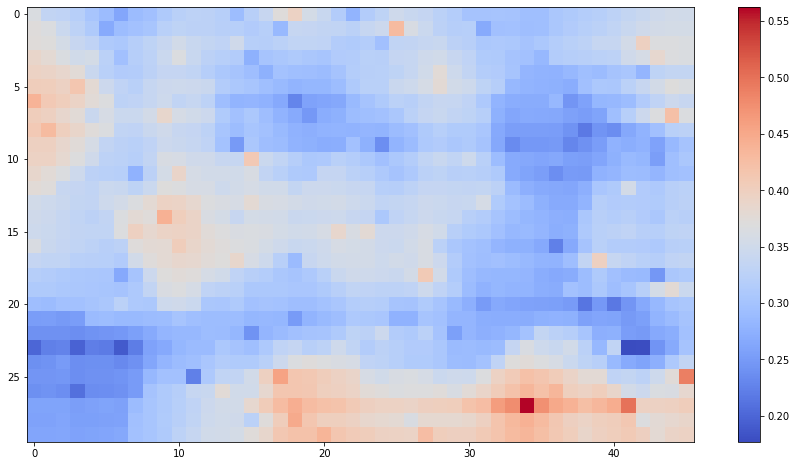

In [765]:
#X_t = test.drop(labels=['Well', 'X', 'Y', 'index'], axis=1).values
res = []
for c in regressors:
    res.append(c.predict(X_tst_tst))
date = pd.DataFrame(np.array(res).T)
submission = date.mean(axis=1)
test_data['pred_NTG45'] = submission
X = np.arange(201, 247, 1)
Y = np.arange(901, 931, 1)
mapX = dict(zip(X, range(0, X.shape[0])))
mapY = dict(zip(Y, range(0, Y.shape[0])))
train_data['X1'] = train_data['X'].map(mapX)
train_data['Y1'] = train_data['Y'].map(mapY)
test_data['X1'] = test_data['X'].map(mapX)
test_data['Y1'] = test_data['Y'].map(mapY)
m5 = np.zeros((Y.shape[0], X.shape[0]))
m5.shape
for i, j, v in zip(train_data['X1'], train_data['Y1'], train_data['NTG']):
    m5[j, i] = v
for i, j, v in zip(test_data['X1'], test_data['Y1'], test_data['pred_NTG45']):
    m5[j, i] = v
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
im = ax.imshow(np.flip(m5, axis=0), cmap='coolwarm')
fig.colorbar(im)
ax.set_aspect(1)
plt.show()

1. Описание алгоритма;
2. Программный код алгоритма;
3. Визуализация предсказаний алгоритма;
4. Выводы по результатам;
5. Сохранение попытки

In [701]:
regressors = []
cv = KFold(n_splits=10, shuffle=True)
for i in range(10):
    rmse = []
    knn2 = KNeighborsRegressor(n_neighbors=2, p=1, weights='distance')
    knn6 = KNeighborsRegressor(n_neighbors=6, p=1, weights='distance')
    knn7 = KNeighborsRegressor(n_neighbors=7, p=1,weights='distance')
    
    knn25 = KNeighborsRegressor(n_neighbors=25, p=1,weights='distance')
    rf = RandomForestRegressor(random_state=42, max_depth=14)
    vr = VotingRegressor([('knn6', knn6), ('knn7', knn7), ('RF', rf), ('knn', knn25), ('knn2', knn2)])
    for train_index, test_index in cv.split(X_2):
        X_train, X_test = X_2[train_index], X_2[test_index]
        y_train, y_test = y_1[train_index], y_1[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                           a=vr.predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.053537891821381654


KeyboardInterrupt: 

Построим визуаилизацию данной матрицы размерности $M \in \mathbb{R}^{30 \times 46}$, где каждый элемент $m_{ij}, i \in 1, \ldots, 30; \ j \in 1, \ldots, 46$ равен значению песчанистости в данной скважине с координатам $X,Y$ из тренировочной выборки, либо 0, если скважина находится в тестовой выборке. По мере предсказания нулевые значения должны заполниться некоторыми значениями.

In [806]:
def build_matrix(train_data, test_data, only_matrix=True):
    train_data = train_data.copy()
    test_data = test_data.copy() 
    x_range, y_range = np.arange(201, 247, 1), np.arange(901, 931, 1)
    mapX = dict(zip(x_range, range(0, x_range.shape[0])))
    mapY = dict(zip(y_range, range(0, y_range.shape[0])))
    train_data['X1'] = train_data['X'].map(mapX)
    train_data['Y1'] = train_data['Y'].map(mapY)
    test_data['X1'] = test_data['X'].map(mapX)
    test_data['Y1'] = test_data['Y'].map(mapY)
    m = np.zeros((y_range.shape[0], x_range.shape[0]))
    for i, j, sandiness in zip(train_data['X1'], train_data['Y1'], train_data['NTG']):
        m[j, i] = sandiness
    return train_data, test_data, m

In [807]:
def visualisation_results(train_data: pd.DataFrame, 
                          test_data: pd.DataFrame, 
                          name_of_prediction_column: str=None, 
                          predict=False, 
                          annotate=False):
    train_data = train_data.copy()
    test_data = test_data.copy()
    train_data, test_data, m = build_matrix(train_data, test_data)
    if predict:
        for i, j, v in zip(test_data['X1'], test_data['Y1'], test_data[name_of_prediction_column]):
            m[j, i] = v
    M = np.flip(m, axis=0)
    fig, ax = plt.subplots(1, 1, figsize=(30, 15))
    if annotate:
        im = sns.heatmap(M, cmap='coolwarm', annot=M)
    else:
        im = ax.imshow(M, cmap='coolwarm')
        cbar = fig.colorbar(im, ax=ax)
        cbar.ax.set_ylabel('Песчанистость', rotation=-90, va="bottom")
        ax.set_aspect(1)
    plt.show()

In [808]:
def visualise(m, annotate=False, **kwargs):
    M = np.flip(m, axis=0)
    fig, ax = plt.subplots(1, 1, figsize=(30, 15))
    if annotate:
        im = sns.heatmap(M, cmap='coolwarm', annot=M,  **kwargs)
    else:
        im = ax.imshow(M, cmap='coolwarm',  **kwargs)
        cbar = fig.colorbar(im, ax=ax)
        cbar.ax.set_ylabel('Песчанистость', rotation=-90, va="bottom")
        ax.set_aspect(1)
    plt.show()

Предположение 2:

до этого момента я хотел использовать координаты данных *лунок* для кластеризации, но в какой-то момент я решил обратиться к картинке из условия:


Так ведь именно данный участок и изображён при визуализации матрицы сверху! По $Y$ - как раз высота от $0$ до $30$ метров, по $X$ - от $201$ до $246$ метров, каждая строка - координаты лунки. Что ещё я понял из данной среза - песчаснистость остаётся одинаковой (похожей)  на некоторой горизонтальной поверхности (на каждом срезе уровня по высоте). Поэтому появилась идея проверить гипотезу о кластеризации - по идее, если всё так, как я задумал, то и кластеризация только по показателю песчанистости будет представлять из себя горизонтальные линии.

Проверим эту гипотезу на основании:
- визуаулизации
- метрики `silhoette_score`

Будем использовать кластеризацию `KMeans`

In [ ]:
d = {}
for k in np.arange(30, 31):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(train_data[['Y']])
    fig, ax = plt.subplots(1,1,figsize=(16, 10))
    train_data['cluster'] = kmeans.labels_
    d[k] = silhouette_score(X=train_data[['Y']], labels=kmeans.labels_)
    for i in np.unique(train_data['cluster']):
        train_data[train_data['cluster'] == i].plot(kind='scatter', 
                                                    x='X', 
                                                    y='Y', 
                                                    ax=ax, color=color[::-1][i], s=250)
    ax.set_title(f'Clusters={k}, Silhoette Score={d[k]:.3}')
    plt.show()